# Jupyter AI

Last Update: Jan 10, 2024

**Jupyter AI** is a JupyterLab extension that provides a friendly user interface between users and AI models.

In [ ]:
pip install -q "openai<1"

In [ ]:
pip install -q "langchain<1"

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import openai
import os

os.environ['OPENAI_API_KEY'] = 'sk-3jJTK5I1lYzu8BeCzQpQT3BlbkFJ915wTVmy******'
openai.api_key = os.getenv('OPENAI_API_KEY')

#### Loadingthe IPython extension:

In [2]:
%load_ext jupyter_ai_magics

#### Getting help with the %%ai command

In [3]:
%ai help

Usage: %%ai [OPTIONS] MODEL_ID

  Invokes a language model identified by MODEL_ID, with the prompt being
  contained in all lines after the first. Both local model IDs and global
  model IDs (with the provider ID explicitly prefixed, followed by a colon)
  are accepted.

  To view available language models, please run `%ai list`.

Options:
  -f, --format [code|html|image|json|markdown|math|md|text]
                                  IPython display to use when rendering
                                  output. [default="markdown"]
  -r, --reset                     Clears the conversation transcript used when
                                  interacting with an OpenAI chat model
                                  provider. Does nothing with other providers.
  -n, --region-name TEXT          AWS region name, e.g. 'us-east-1'. Required
                                  for SageMaker provider; does nothing with
                                  other providers.
  -q, --request-schema TEXT 

In [4]:
%ai list --help

Usage: %ai list [OPTIONS] [PROVIDER_ID]

  List language models, optionally scoped to PROVIDER_ID.

Options:
  --help  Show this message and exit.


#### Listing all providers and models available

In [5]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-tg1-large`, `bedrock:anthropic.claude-v1`, `bedrock:anthropic.claude-instant-v1`, `bedrock:ai21.j2-jumbo-instruct`, `bedrock:ai21.j2-grande-instruct` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0` |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:medium`, `cohere:xlarge` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See https://huggingface.co/models for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-0301` |
| `openai-chat-new` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat-new:gpt-4`, `openai-chat-new:gpt-4-0314`, `openai-chat-new:gpt-4-32k`, `openai-chat-new:gpt-4-32k-0314`, `openai-chat-new:gpt-3.5-turbo`, `openai-chat-new:gpt-3.5-turbo-0301` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must include the `--region_name`, `--request_schema`, and the `--response_path` arguments. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |


#### Listing all models offered by a specific provider

In [6]:
%ai list openai

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |


#### Changing the format of the output

In [9]:
%%ai chatgpt -f math
Generate the 2D heat equation in LaTeX surrounded by `$$`. Do not include an explanation.

<IPython.core.display.Math object>

#### Making a request to gpt-3.5-turbo

In [10]:
%%ai openai-chat:gpt-3.5-turbo
lists vs. tuples vs. sets in Python

In Python, there are three different types of collections: lists, tuples, and sets. 

- Lists: Lists are ordered and mutable, meaning that you can change, add, and remove elements from them. They are created using square brackets `[]` and elements are separated by commas. Example: `[1, 2, 3]`

- Tuples: Tuples are ordered and immutable, meaning that once a tuple is created, you cannot change its elements. They are created using parentheses `()` and elements are separated by commas. Example: `(1, 2, 3)`

- Sets: Sets are unordered and mutable collections of unique elements. They are created using curly braces `{}` or the `set()` constructor. Example: `{1, 2, 3}` or `set([1, 2, 3])`

All three types can contain elements of different types and can be used for different purposes depending on your needs.

In [13]:
%%ai chatgpt
how to sort lists in Python?

In Python, you can sort lists by using the `sort()` method or the `sorted()` function.

- The `sort()` method sorts the list in place, which means it modifies the original list. Example:
```python
my_list = [3, 1, 2]
my_list.sort()
print(my_list)  # Output: [1, 2, 3]
```

- The `sorted()` function returns a new sorted list without modifying the original list. Example:
```python
my_list = [3, 1, 2]
sorted_list = sorted(my_list)
print(sorted_list)  # Output: [1, 2, 3]
print(my_list)  # Output: [3, 1, 2]
```

Both methods can also accept optional parameters for custom sorting. For instance, you can use the `reverse=True` parameter to sort the list in descending order.

In [14]:
%%ai gpt.3.4-turbo
explain dict.update()

Cannot determine model provider from model ID `gpt.3.4-turbo`.

To see a list of models you can use, run `%ai list`

If you were trying to run a command, run `%ai help` to see a list of commands.

#### Generate code

In [15]:
%%ai chatgpt -f code 
define a function that calculates the factorial of n. 
call the function with 10 as an argument.

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

result = factorial(10)
print(result)

In [16]:
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

print(factorial(10))

3628800


In [17]:
%%ai chatgpt -f code 
change the function to be a recursive one. 
call the function with 8 as an argument.

In [ ]:
def factorial(n):
    return 1 if n == 0 else n * factorial(n-1)

result = factorial(8)
print(result)

In [18]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

print(factorial(8))

40320


#### Clear the chat history

In [19]:
%%ai chatgpt -r 
clear the chat history

### Interpolation in Jupyter AI

In [20]:
# generating an error on purpose
a, b = 10, '4'
a + b 

TypeError: unsupported operand type(s) for +: 'int' and 'str'

#### Explain the error and give the solution using interpolation

In [22]:
%%ai chatgpt
Explain the following Python error: {Err[20]}. 
Give me the correct code.

The above Python error is a TypeError. It occurs when we try to perform an unsupported operation on two different types of data. In this case, the error is caused by trying to add an integer (`a`) and a string (`b`).

The error message specifically states "unsupported operand type(s) for +: 'int' and 'str'." This means that the `+` operator does not support adding an integer and a string together.

To resolve this error, we need to make sure that we are performing the appropriate operation between compatible data types. In this case, we can convert the integer to a string and then concatenate them:

```python
a, b = 10, '4'
a_str = str(a)
result = a_str + b
print(result)
```

This will output `104` in this specific case.

In [23]:
s1='Hello Python!

SyntaxError: unterminated string literal (detected at line 1) (57405892.py, line 1)

In [24]:
%ai error chatgpt

The above Python error is a SyntaxError. It occurs when there is an issue with the syntax or structure of the code that makes it invalid according to the rules of the Python language.

In this case, the error message specifically states "unterminated string literal (detected at line 1)." This means that there is a problem with the string declaration on line 1.

The error occurs because the string `s1` is not properly terminated with a closing quotation mark. The code should be modified to add a closing quotation mark to resolve the error:

```python
s1 = 'Hello Python!'
```

This updated code correctly terminates the string literal with a closing quotation mark, resolving the SyntaxError.

#### Explaining code

In [25]:
x = [n**2 for n in range(10)]

In [26]:
%%ai chatgpt
Please explain the code above:
{In[25]}

The given code is a list comprehension in Python. It creates a list called `x` by applying a mathematical operation to a range of numbers.

Here's a breakdown of the code:

- `range(10)` generates a sequence of numbers from 0 to 9 (excluding 10).
- `n**2` is the mathematical operation that squares each number in the range.
- The syntax `[n**2 for n in range(10)]` is a list comprehension that applies the operation `n**2` to each element in the range and generates a list containing the results.

Therefore, the code creates a list `x` that holds the squares of the numbers from 0 to 9. The resulting list would be: `[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]`.

In [27]:
nums = [0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105]
nums

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105]

In [28]:
%%ai chatgpt
Define a function that takes an argument and returns this sequence of numbers: {Out[27]}
The function's argument is the number of elements in the sequence.

Here's the definition of a function that takes an argument `n` and returns a sequence of numbers with `n` elements: `[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105]`.

```python
def generate_sequence(n):
    sequence = []
    num = 0
    for i in range(n):
        sequence.append(num)
        num += i + 1
    return sequence
```

In this function:
- An empty list `sequence` is initialized to store the numbers.
- The variable `num` is set to 0. It represents the current number in the sequence.
- A `for` loop runs `n` times, where `i` takes values from 0 to `n-1`.
- In each iteration, `num` is appended to the `sequence` list, and `num` is updated by adding `i + 1` to it. This creates the pattern of incrementing values.
- After the loop is completed, the `sequence` list is returned.

You can call this function with the desired number of elements to generate the corresponding sequence. For example, `generate_sequence(15)` will return `[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105]`.

In [29]:
def number_sequence(n):
    sequence = []
    for i in range(n):
        next_num = i * (i + 1) // 2
        sequence.append(next_num)
    return sequence

In [30]:
print(number_sequence(20))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120, 136, 153, 171, 190]


### Using Jupyter AI with other models and providers

In [ ]:
pip install huggingface-hub -q

In [31]:
# sighn-up with https://huggingface.co/ and generate an API key
os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'hf_UjyrLrKKqTAhYPgUSsKZLSVZ*****'

#### Generating images using stable-diffusion of Stability AI

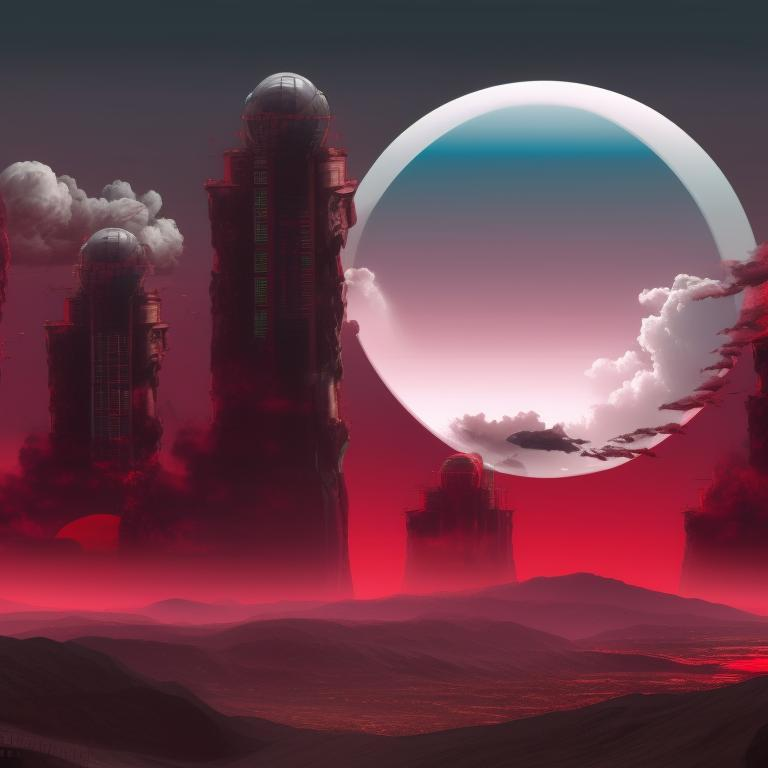

In [32]:
%%ai huggingface_hub:stabilityai/stable-diffusion-2-1 --format image
dystopian fantasy landscape, cyberpunk style, flying objects, red moon in the backgroud